In [1]:
%reload_ext tensorboard

import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from datetime import datetime
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [2]:

dm_index = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/dm_index.csv',sep=',',index_col=0)
dm_pe = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/dm_pe.csv',sep=',',index_col=0)
dm_pb = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/dm_pb.csv',sep=',',index_col=0)
dm_ps = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/dm_ps.csv',sep=',',index_col=0)



In [3]:
em_index = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/em_index.csv',sep=',',index_col=0)
em_pe = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/em_pe.csv',sep=',',index_col=0)
em_pb = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/em_pb.csv',sep=',',index_col=0)
em_ps = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Sample Data/em_ps.csv',sep=',',index_col=0)

In [4]:
dm_returns = dm_index.shift(-22)/dm_index -1
em_returns = em_index.shift(-22)/em_index -1

In [5]:
dm_returns.head(5)

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,USA
4/22/99,-0.038549,-0.049290,-0.020230,0.001701,0.041047,-0.076975,0.029804,0.001688,-0.026837,-0.055964,...,0.007909,-0.043698,-0.039064,0.016144,0.052100,0.036972,0.030054,-0.016676,-0.031766,-0.039690
4/23/99,-0.060999,-0.094688,-0.022170,-0.030230,0.044227,-0.048736,0.028191,-0.013074,-0.034386,-0.071613,...,-0.002061,-0.096779,-0.046556,0.012635,0.024811,0.019539,0.018183,-0.031558,-0.043465,-0.055487
4/26/99,-0.063079,-0.100879,-0.043276,-0.039314,0.036735,-0.046693,0.014634,-0.032891,-0.045502,-0.078464,...,-0.017178,-0.110196,-0.042651,0.010686,0.011206,0.008148,-0.006712,-0.049313,-0.056325,-0.043005
4/27/99,-0.074622,-0.106367,-0.071366,-0.048990,-0.001604,-0.077402,-0.027206,-0.078704,-0.077288,-0.103204,...,-0.052894,-0.114429,-0.056288,0.000958,0.022153,-0.025643,-0.036017,-0.086381,-0.075438,-0.059511
4/28/99,-0.074357,-0.116717,-0.062141,-0.040973,-0.018093,-0.042334,-0.026868,-0.068111,-0.071713,-0.125120,...,-0.061152,-0.123910,-0.052332,-0.003539,0.047738,-0.014197,-0.031143,-0.075986,-0.067875,-0.036401


In [6]:
dm_returns = dm_returns.dropna()
dm_returns.shape

(5196, 23)

In [7]:
em_returns.head(5)

,EM (Emerging Markets),China,India,Indonesia,Korea,Malaysia -EM,Pakistan,Philippines,Sri Lanka,Taiwan,...,Egypt,Greece,Hungary,Poland,Qatar,Russia,Russia ADR/GDR Index,South Africa,Turkey,United Arab Emirates
4/15/99,0.088020,0.164491,0.207849,0.478506,0.033282,0.363094,0.218559,0.092153,-0.011290,-0.014202,...,0.013484,0.065111,0.103190,0.076204,NaN,0.266419,NaN,-0.042092,0.222676,NaN
4/16/99,0.075693,0.137080,0.147163,0.341103,0.042655,0.348395,0.229328,0.066936,0.003008,-0.023790,...,0.006389,0.136219,0.110324,0.091773,NaN,0.308283,NaN,-0.062246,0.203267,NaN
4/19/99,0.052199,0.102633,0.201043,0.301372,-0.034310,0.299177,0.227341,-0.025652,0.006101,-0.048632,...,0.015093,0.205412,0.118972,0.081435,NaN,0.211721,NaN,-0.095692,0.215847,NaN
4/20/99,0.052090,0.049777,0.186168,0.339287,-0.075789,0.289750,0.217920,-0.041225,0.047975,-0.045171,...,0.021414,0.213831,0.083994,0.052866,NaN,0.244424,NaN,-0.085205,0.079457,NaN
4/21/99,0.055375,0.006688,0.158132,0.357532,-0.028749,0.283130,0.214858,-0.016460,0.055243,-0.022395,...,0.002499,0.226454,0.072688,0.079040,NaN,0.288111,NaN,-0.055005,0.064506,NaN


In [8]:
em_returns.shape

(5218, 28)

In [9]:
scaled_dm_returns = dm_returns.apply(lambda x:(x-x.min()) / (x.max()-x.min()),axis=1)
scaled_dm_pe = dm_pe.apply(lambda x:(x-x.min()) / (x.max()-x.min()),axis=1)
scaled_dm_pb = dm_pb.apply(lambda x:(x-x.min()) / (x.max()-x.min()),axis=1)
scaled_dm_ps = dm_ps.apply(lambda x:(x-x.min()) / (x.max()-x.min()),axis=1)

In [10]:
scaled_dm_returns.describe()

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,USA
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,...,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000
mean,0.510528,0.516806,0.503445,0.517395,0.546396,0.509907,0.502887,0.505509,0.513686,0.480101,...,0.506677,0.500291,0.523230,0.475275,0.511719,0.492303,0.515150,0.510747,0.484296,0.506631
std,0.237797,0.295270,0.258685,0.241061,0.244424,0.309542,0.174940,0.213300,0.271350,0.290868,...,0.208305,0.305015,0.292843,0.277764,0.269990,0.266228,0.241171,0.214029,0.186798,0.230975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343910,0.283861,0.316608,0.349611,0.376502,0.281869,0.373302,0.369199,0.315957,0.254594,...,0.365172,0.266515,0.305914,0.266657,0.321063,0.306044,0.347995,0.352270,0.359801,0.339449
50%,0.514394,0.508148,0.506915,0.516211,0.541848,0.519303,0.500434,0.507092,0.516227,0.476563,...,0.507337,0.497031,0.524943,0.476570,0.515482,0.490125,0.514823,0.516534,0.481272,0.498388
75%,0.685000,0.754990,0.695754,0.689033,0.722138,0.740555,0.629374,0.641071,0.709307,0.703860,...,0.653258,0.737534,0.747066,0.669500,0.710168,0.676015,0.680484,0.667035,0.613878,0.672532
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
scaled_dm_pe.describe()

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,USA
count,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,...,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000
mean,0.411331,0.159838,0.354406,0.456740,0.540571,0.587247,0.318047,0.272337,0.544619,0.489200,...,0.337241,0.405485,0.174063,0.347455,0.410551,0.271384,0.490359,0.509185,0.288315,0.524726
std,0.126077,0.140966,0.291747,0.140012,0.251450,0.198562,0.160636,0.164514,0.240229,0.340505,...,0.183532,0.395235,0.156321,0.192992,0.187809,0.153029,0.155519,0.177357,0.158192,0.170280
min,0.020389,0.000000,0.000000,0.021544,0.000000,0.018967,0.014085,0.000000,0.031085,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027269,0.020554,0.000000,0.022811
25%,0.338160,0.056347,0.112314,0.365492,0.383277,0.462691,0.197939,0.162445,0.355835,0.233282,...,0.192285,0.019377,0.057432,0.205567,0.273814,0.174601,0.380617,0.390423,0.179738,0.413746
50%,0.411528,0.131799,0.268565,0.460910,0.564053,0.574699,0.288107,0.222584,0.497361,0.382518,...,0.337400,0.263249,0.130005,0.321032,0.395961,0.273108,0.478184,0.506051,0.267253,0.511067
75%,0.491645,0.231213,0.530622,0.545650,0.722233,0.716820,0.413358,0.353015,0.696318,0.809118,...,0.468536,0.853723,0.254430,0.452194,0.526348,0.380257,0.591694,0.627290,0.400288,0.657371
max,0.987484,0.980165,1.000000,0.993072,1.000000,1.000000,0.983170,0.982485,1.000000,1.000000,...,0.981815,1.000000,0.981072,1.000000,1.000000,0.980201,0.993306,1.000000,0.981594,0.987581


In [12]:
scaled_dm_pe.shape

(5218, 23)

In [13]:
scaled_dm_pe = scaled_dm_pe[scaled_dm_pe.index.isin(scaled_dm_returns.index)]
scaled_dm_pb = scaled_dm_pb[scaled_dm_pb.index.isin(scaled_dm_returns.index)]
scaled_dm_ps = scaled_dm_ps[scaled_dm_ps.index.isin(scaled_dm_returns.index)]

In [14]:
scaled_dm_returns.shape,scaled_dm_pe.shape

((5196, 23), (5196, 23))

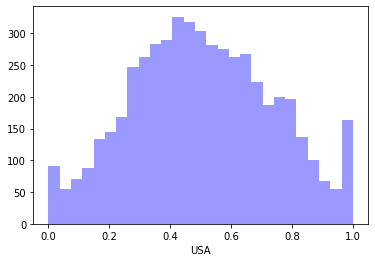

In [15]:
import seaborn as sns
sns.distplot(scaled_dm_returns['USA'],color='blue',kde=False);

In [16]:
#prepare the sequence 
def create_dataset(df1, df2, df3, df4, colidx):
    df1 = np.array(df1.iloc[:,colidx])
    df1 = df1.reshape((len(df1),1))
    df2 = np.array(df2.iloc[:,colidx])
    df2 = df2.reshape((len(df2),1))
    df3 = np.array(df3.iloc[:,colidx])
    df3 = df3.reshape((len(df3),1))
    df4 = np.array(df4.iloc[:,colidx])
    df4 = df4.reshape((len(df4),1))
    dataset = np.hstack((df1,df2,df3,df4,df4))
    splitpnt = len(dataset) *2 //3
    train_data = dataset[:splitpnt,:]
    val_data = dataset[splitpnt+1:,:]
    return train_data, val_data

In [17]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [20]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

n_steps = 22
n_features = 4
n_seq = 1

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
    !rm -rf ./logs/

    n=23#change the values to get loss for each country
    i = scaled_dm_returns.shape[1]-n
    t, v = create_dataset(scaled_dm_pe, scaled_dm_pb, scaled_dm_ps, scaled_dm_returns, i)
    tx, ty = split_sequences(t, n_steps)
    vx, vy = split_sequences(v, n_steps)
    tx = tx.reshape((tx.shape[0], n_seq, n_steps, n_features))
    vx = vx.reshape((vx.shape[0], n_seq, n_steps, n_features))
    filename = 'CNN-LSTM-' + scaled_dm_returns.columns[i] +'.json'
    print(filename)
    model.fit(tx,ty,epochs=150, validation_data=(vx, vy),callbacks=[tensorboard_callback])
    history = model.fit(tx,ty,epochs=150, validation_data=(vx, vy))
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model train vs validation loss for ' + scaled_dm_returns.columns[i])
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.savefig(('CNN-LSTM-' + scaled_dm_returns.columns[i] + '.png'))
    pyplot.close()
    hist_df = pd.DataFrame(history.history)
    print(scaled_dm_returns.columns[i] + ' done')
    with open(filename, mode='w') as f:
        hist_df.to_json(f)
    del history
    del t
    del v
    del tx
    del ty
    del vx
    del vy
    del hist_df


CNN-LSTM-Australia.json
Epoch 1/150
108/108 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 2/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 5/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 6/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 7/150
108/108 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 8/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 10/150
108/108 [==============================] - 0s 2ms/step

108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0100
Epoch 82/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0083
Epoch 83/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 84/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0094
Epoch 85/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0092
Epoch 86/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0096
Epoch 87/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0084
Epoch 88/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0085
Epoch 89/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0119
Epoch 90/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 

108/108 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0251
Epoch 12/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0366
Epoch 13/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0254
Epoch 14/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0282
Epoch 15/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0301
Epoch 16/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0299
Epoch 17/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0343
Epoch 18/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0257
Epoch 19/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0314
Epoch 20/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 

108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0700
Epoch 92/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0801
Epoch 93/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0779
Epoch 94/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0580
Epoch 95/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0505
Epoch 96/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0571
Epoch 97/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0741
Epoch 98/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0752
Epoch 99/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0709
Epoch 100/150
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss:

In [ ]:
scaled_dm_returns.columns